In [1]:
import sympy as sp
import pandas as pd

In [2]:
# Экзогенные переменные
X, Cg, Iin, TRh, Tpe, Tpd, Pm, Pe, sh, le, ld, ae, ad, kh, kg = sp.symbols('X, C_h, Iin, TRh, Tpe, Tpd, Pm, Pe, sh, le, ld, ae, ad, kh, kg')
th, tprof, tothinc, tprop, tland, tsoc = sp.symbols('th, tprof, tothinc, tprop, tland, tsoc')
we, wd = sp.symbols('we, wd')

# Параметры CET- и CES-функций
A, B, dlt, lmd, rho, theta = sp.symbols('A, B, delta, lambda, rho, theta')
params = {A: 2.26106017989894, B: 1.66589685945624, dlt: 0.794199409322518, lmd: 0.141918245541008,
          rho: 2.76169315636207, theta: -0.761693156362071}

In [3]:
exog_2021 = {X: 13103.0562225032, Cg: 1430.9285851, Iin: 2025.562246,
             TRh: 916.9637628, Tpe: -7.03807847138587, Tpd: 16.6440517367992,
             Pm: 1, Pe: 1, sh: 0.29438678012272, kh: 0.342, kg: 0.0554461514145331,
             le: 0.0863846277934052, ld: 0.228683678384995,
             we: 0.0000879354728225254, wd: 0.0000583752438914598,
             ae: 0.331748410948495, ad: 0.461676604530526,
             th: 0.0882216514153222, tprof: 0.132291569356853,
             tothinc: 0.0973925585452106, tprop: 0.00674840850092202,
             tland: 0.000435857703960073, tsoc: 0.209953667320656}

In [4]:
scen = {X: 13103.0562225032, Cg: 1430.9285851, Iin: 2025.562246,
        TRh: 916.9637628, Tpe: -7.03807847138587, Tpd: 16.6440517367992,
        Pm: 1, Pe: 1, sh: 0.29438678012272, kh: 0.342, kg: 0.0554461514145331,
        le: 0.0863846277934052, ld: 0.228683678384995,
        we: 0.0000879354728225254, wd: 0.0000583752438914598,
        ae: 0.331748410948495, ad: 0.461676604530526,
        th: 0.0882216514153222, tprof: 0.0740244718768841,
        tothinc: 0.0973925585452106, tprop: 0.00377610892151948,
        tland: 0.000243886564396888, tsoc: 0.131830376934916}

In [5]:
# Эндогенные переменные - 1
Th, Ch, Inch, GPe, GPd, D, Mic, Mfc, Pd = sp.symbols('Th, Ch, Inch, GPe, GPd, D, Mic, Mfc, Pd')
# Эндогенные переменные - 2
E, M, Q, SFe, SFd, TPe, TPd, TPx = sp.symbols('E, M, Q, SFe, SFd, TPe, TPd, TPx')
Cd, Ce = sp.symbols('Cd, Ce')
Yd, Ye = sp.symbols('Yd, Ye')
Le, Ld = sp.symbols('Le, Ld')
SIe, SId, SIx = sp.symbols('SIe, SId, SIx')
Tprope, Tlande, Tpropd, Tlandd, Tpropx, Tlandx = sp.symbols('Tprope, Tlande, Tpropd, Tlandd, Tpropx, Tlandx')
Tprof, Tothinc, Tf = sp.symbols('Tprof, Tothinc, Tf')
Sh, Sf, Sg, S = sp.symbols('Sh, Sf, Sg, S')
CB, I = sp.symbols('CB, I')
GPh, GPf, GPg = sp.symbols('GPh, GPf, GPg')
Incf, Incg, Incrw = sp.symbols('Incf, Incg, Incrw')
Pde, Pdm = sp.symbols('Pde, Pdm')
alpha_d = sp.symbols('alpha_d')

In [6]:
# CGE-модель
def CGE_2(params, exog):
  eq_1 = sp.Eq(Th, th*(Inch - TRh - (le*(X - D) + ld*D)*tsoc) + (le*(X - D) + ld*D)*tsoc).subs(exog)
  eq_2 = sp.Eq(Inch, (le*(X - D) + ld*D)*(1 + tsoc) + (GPe + GPd)*kh + TRh).subs(exog)
  eq_3 = sp.Eq(Ch, (1 - sh)*(Inch - Th)).subs(exog)
  eq_4 = sp.Eq(D, ad*D + ld*D*(1 + tsoc) + GPd + Tpd + (tprop + tland)*D).subs(exog)
  eq_5 = sp.Eq(X - D, ae*(X - D) + le*(X - D)*(1 + tsoc) + GPe + Tpe + (tprop + tland)*(X - D)).subs(exog)
  eq_6 = sp.Eq(D, ad*D + Ch + Cg + Iin - Mfc).subs(exog)
  eq_7 = sp.Eq(Mic, ae*(X - D)).subs(exog)
  eq_8 = sp.Eq(Mic + Mfc, D*((lmd*Pd/(1 - lmd))**(1/(1 - theta)))).subs(params).subs(exog)
  eq_9 = sp.Eq(X - D, D*(((1 - dlt)/(dlt*Pd))**(1/(rho - 1)))).subs(params).subs(exog)
  model = sp.nsolve([eq_1, eq_2, eq_3, eq_4, eq_5, eq_6, eq_7, eq_8, eq_9],
                    [D, Pd, Mic, Mfc, GPe, GPd, Inch, Ch, Th],
                    [100, 1, 100, 100, 100, 100, 100, 100, 100], dict = True)[0]
  model_2 = {E: (X - model[D]).subs(exog),
             M: model[Mic] + model[Mfc],
             Q: model[D] + model[Mic] + model[Mfc],
             Ce: (ae*(X - model[D])).subs(exog),
             Cd: (ad*model[D]).subs(exog),
             Ye: ((1 - ae)*(X - model[D])).subs(exog),
             Yd: ((1 - ad)*model[D]).subs(exog),
             GPh: ((model[GPe] + model[GPd])*kh).subs(exog),
             GPf: ((model[GPe] + model[GPd])*(1 - kh - kg)).subs(exog),
             GPg: ((model[GPe] + model[GPd])*kg).subs(exog),
             SFe: (le*(X - model[D])*(1 + tsoc)).subs(exog),
             SFd: (ld*model[D]*(1 + tsoc)).subs(exog),
             SIe: (le*(X - model[D])*tsoc).subs(exog),
             SId: (ld*model[D]*tsoc).subs(exog),
             SIx: ((le*(X - model[D]) + ld*model[D])*tsoc).subs(exog),
             Le: round((le*(X - model[D])/(12*we)).subs(exog)/1000),
             Ld: round((ld*model[D]/(12*wd)).subs(exog)/1000),
             Tprope: (tprop*(X - model[D])).subs(exog),
             Tlande: (tland*(X - model[D])).subs(exog),
             Tpropd: (tprop*model[D]).subs(exog),
             Tlandd: (tland*model[D]).subs(exog),
             Tpropx: (tprop*X).subs(exog),
             Tlandx: (tland*X).subs(exog),
             TPe: (Tpe + (tprop + tland)*(X - model[D])).subs(exog),
             TPd: (Tpd + (tprop + tland)*model[D]).subs(exog),
             TPx: (Tpe +  Tpd + (tprop + tland)*X).subs(exog),
             Tprof: (tprof*(1 - tothinc)*((model[GPe] + model[GPd])*(1 - kh - kg) + (model[GPe] + model[GPd])*kg)).subs(exog),
             Tothinc: (tothinc*((model[GPe] + model[GPd])*(1 - kh - kg) + (model[GPe] + model[GPd])*kg)).subs(exog),
             Sh: (sh*(model[Inch] - model[Th])).subs(exog),
             Incf: ((model[GPe] + model[GPd])*(1 - kh - kg)).subs(exog),
             }
  model_3 = {Incg: ((model[GPe] + model[GPd])*kg + Tpe + Tpd + (tprop + tland)*X + model[Th] + model_2[Tprof] + model_2[Tothinc]).subs(exog),
             Tf: model_2[Tprof] + model_2[Tothinc],
             Sf: model_2[Incf] - model_2[Tprof] - model_2[Tothinc],
             CB: model_2[M] - model_2[E],
             I: Iin.subs(exog),
             }
  model_4 = {Sg: (model_3[Incg] - Cg - TRh).subs(exog),
             S: (model_2[Sh] + model_3[Sf] + model_3[Incg] - Cg - TRh + model_2[M] - model_2[E]).subs(exog),
             Incrw: model_2[M],
             Pde: ((model[Pd]*model[D] + Pe*model_2[E])/X).subs(exog),
             Pdm: ((model[Pd]*model[D] + Pm*model_2[M])/model_2[Q]).subs(exog),
             alpha_d: (model[D]/X).subs(exog)
             }
  model.update(model_2)
  model.update(model_3)
  model.update(model_4)
  return model

In [7]:
C = CGE_2(params, exog_2021)
D = CGE_2(params, scen)

In [8]:
table_C = pd.DataFrame(list(C.items()), columns = ['endog_var', 'current'])
table_D = pd.DataFrame(list(D.items()), columns = ['endog_var', 'future'])
table_C['future'] = table_D['future']
for i in range(len(table_C)):
  table_C['delta'] = table_C['future'] - table_C['current']
for i in range(len(table_C)):
  table_C.at[i, '%'] = round((table_C.at[i, 'delta']/abs(table_C.at[i, 'current'])*100), 2)
table_C

,endog_var,current,future,delta,%
0,D,8946.42924598059,8967.93615656016,21.5069105795665,0.24
1,Pd,1.00000000000002,1.01345861578470,0.0134586157846770,1.35
2,Mic,1378.95439436702,1371.81951095784,-7.13488340918252,-0.52
3,Mfc,1842.46916207632,1881.94644095809,39.4772788817688,2.14
4,GPe,2320.39188669304,2349.41342624571,29.0215395526689,1.25
5,GPd,2259.70753859594,2453.77364335550,194.066104759559,8.59
6,Inch,5393.26127487370,5285.13686800895,-108.124406864751,-2.00000000000000
7,Ch,3202.05049999999,3253.10545201101,51.0549520110189,1.59
8,Th,855.292866973276,674.813024336079,-180.479842637197,-21.10
9,E,4156.62697652261,4135.12006594304,-21.5069105795665,-0.52


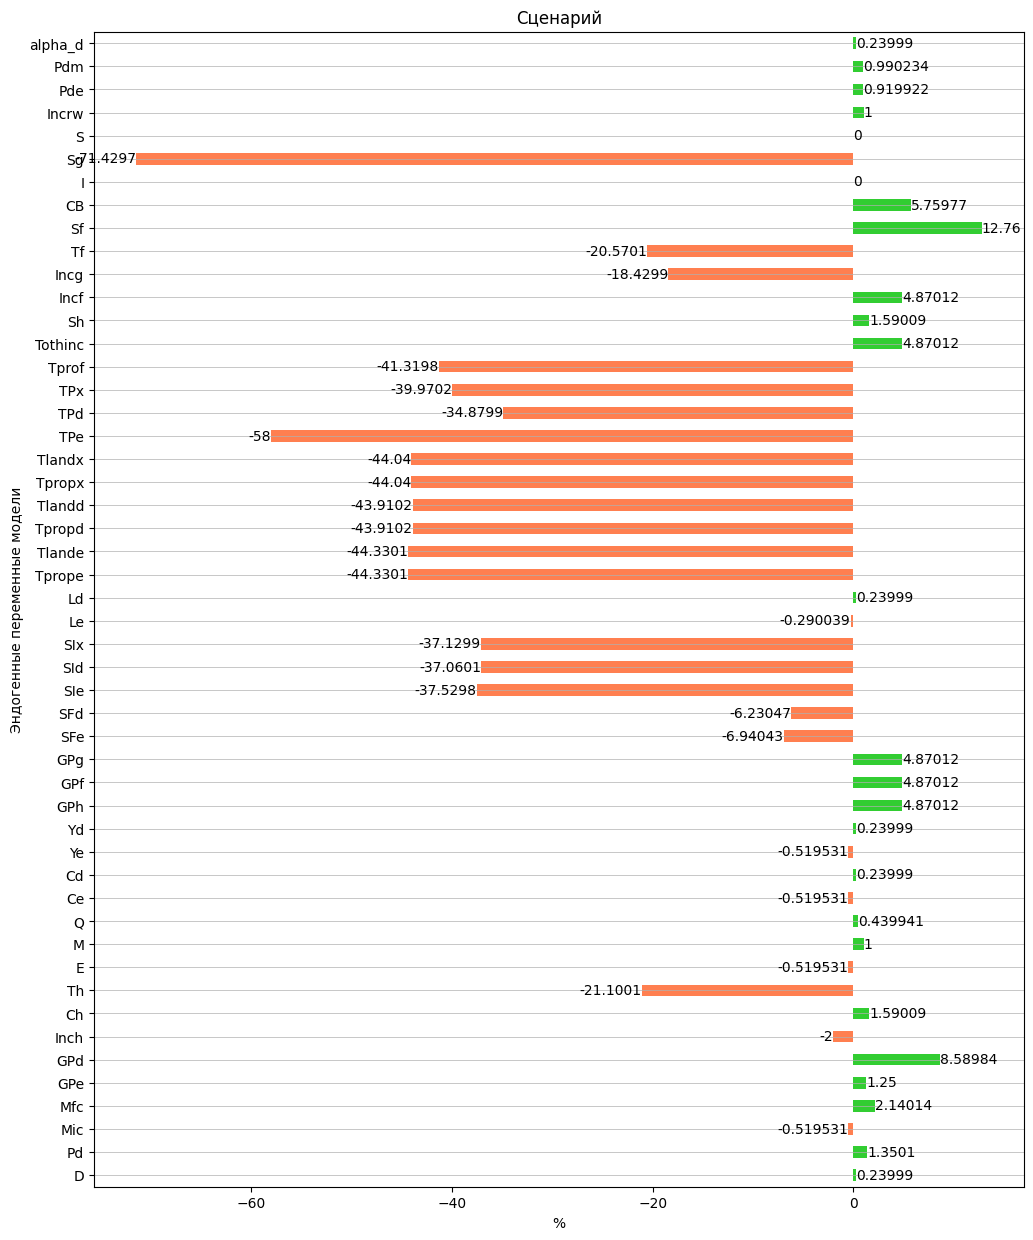

In [9]:
table_C['%'] = table_C['%'].astype(float)
import matplotlib.pyplot as plt
scen_plot_1 = table_C.plot.barh(x = 'endog_var', y = '%', figsize = (12, 15),
                  ylabel = 'Эндогенные переменные модели', xlabel = '%',
                  legend = False, title = 'Сценарий',
                  color = (table_C['%'] > 0).map({True: 'limegreen', False: 'coral'}))
scen_plot_1.grid(axis = 'y', linewidth = 0.5)
scen_plot_1.bar_label(scen_plot_1.containers[0]);

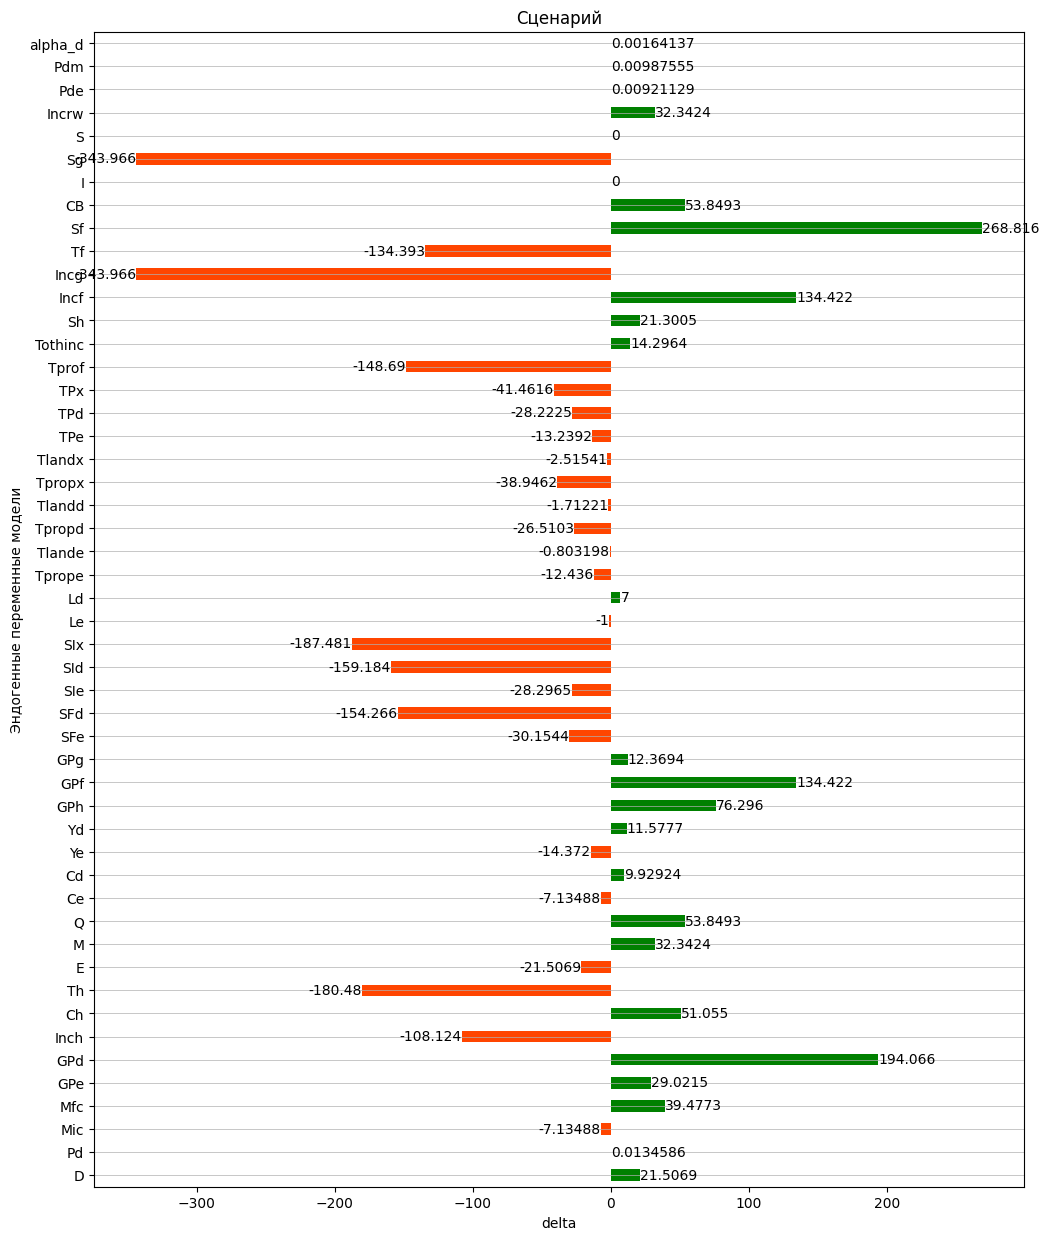

In [10]:
table_C['delta'] = table_C['delta'].astype(float)
import matplotlib.pyplot as plt
scen_plot_2 = table_C.plot.barh(x = 'endog_var', y = 'delta', figsize = (12, 15),
                  ylabel = 'Эндогенные переменные модели', xlabel = 'delta',
                  legend = False, title = 'Сценарий',
                  color = (table_C['delta'] > 0).map({True: 'green', False: 'orangered'}))
scen_plot_2.grid(axis = 'y', linewidth = 0.5)
scen_plot_2.bar_label(scen_plot_2.containers[0]);